<a href="https://colab.research.google.com/github/rupeshthapa123/NotebookProject/blob/main/RupeshThapa_Lab8_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab8. Clustering

Clustering is a powerful example of Unsupervised Learning, in which the dataset is not classified or labeled a priori.
Unlabeled data is more common than we think, almost all multimedia is unlabeled: audio, image and video are good examples. Also, real time data is unlabeled by nature as there may be no time for labelling it on the fly. Although Unsupervised Learning is not as famous or fancy as Supervised Learning, it plays an important role on initial data analysis and gives options when dealing with difficult datasets.

In this lab, you will implement the clustering algorithm to analyze an unlabeled dataset. Use the lecture slides to guide you through the implementation.



## Part1. Dataset

Create a dataset with four clusters using the make_blobs function in Sklearn library. You can refer to the lecture slides.

In [ ]:
# write your code here
import numpy as np
from sklearn.datasets import make_blobs

blob_centers = np.array(
    [[0.2, 2.3],
     [-1.5, 2.3],
     [-2.8, 1.8],
     [-1.3, 1.3]])
blob_std = np.array([0.1,0.2,0.3,0.4])

In [ ]:
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std, random_state=7)

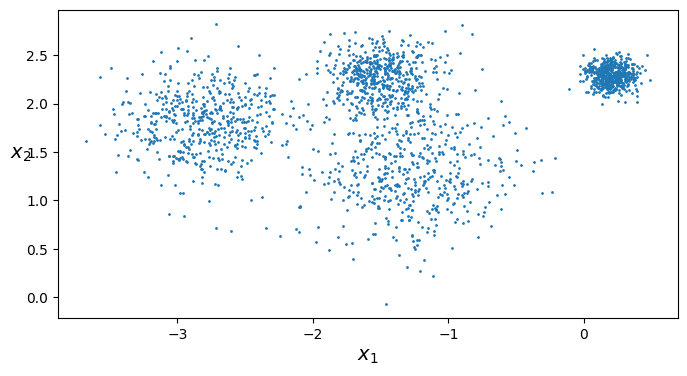

In [ ]:
from matplotlib import pyplot as plt

def plot_clusters(X, y=None):
  plt.scatter(X[:,0],X[:,1], c=y, s=1)
  plt.xlabel("$x_1$", fontsize=14)
  plt.ylabel("$x_2$", fontsize=14, rotation=0)

plt.figure(figsize= (8, 4) )
plot_clusters(X)
#plt.save_fig("blobs_plot")
plt.show()

## Part2. Implement the clustering algorithm using Sklearn library

1. Use the dataset you created before to train a clustering model
2. Provide the final computed centroids in the model
3. Propose two never seen datapoints and use the model to predict their corresponding cluster

In [ ]:
# write your code here
from sklearn.cluster import KMeans
k = 4
kmeans = KMeans(n_clusters=k, n_init=1)
y_pred = kmeans.fit_predict(X)

In [ ]:
y_pred

array([1, 0, 2, ..., 1, 2, 0], dtype=int32)

In [ ]:
y_pred is kmeans.labels_

True

In [ ]:
kmeans.cluster_centers_

array([[-2.80414344,  1.80786271],
       [-1.2791246 ,  1.19899862],
       [ 0.19504931,  2.28748153],
       [-1.49340454,  2.24313877]])

In [ ]:
X_new = np.array([[0,2],[4,1],[3,2],[-2,1.5]])
kmeans.predict(X_new)

array([2, 2, 2, 1], dtype=int32)

In [ ]:
Y_new = np.array([[0,6],[3,3],[4,-1],[-3,2]])
kmeans.predict(Y_new)

array([2, 2, 2, 0], dtype=int32)

## Part3. Centroid initialization

1. Propose two different initialization vectors and train two new clustering models
2. For each model, provide the corresponding inertia

In [ ]:
good_init1 = np.array([[-2,1],[4,3],[-2,6],[-1,5]])
kmeans = KMeans(n_clusters=4, init=good_init1, n_init=1)
kmeans.fit_predict(X)
kmeans.inertia_

264.68935792701615

In [ ]:
good_init2 = np.array([[3,1],[-2,8],[-4,-6],[3,5]])
kmeans = KMeans(n_clusters=4, init=good_init2, n_init=1)
kmeans.fit_predict(X)
kmeans.inertia_

264.67654895195255

## Part4. Optimal K

Verify that K=4 is correct by finding the silhouette score for K=3, K=4 and K=5

NOTE: You will need to train three different models for each score.

In [ ]:
from sklearn.metrics import silhouette_score
#silhouette_score(X, kmeans.labels_)
silhouette_scores = []
for k in range(3, 6):
    kmeans = KMeans(n_clusters=k, n_init=1)
    kmeans.fit(X)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

print(silhouette_scores)

[0.5995990825782954, 0.6460133146038682, 0.6092199105155396]


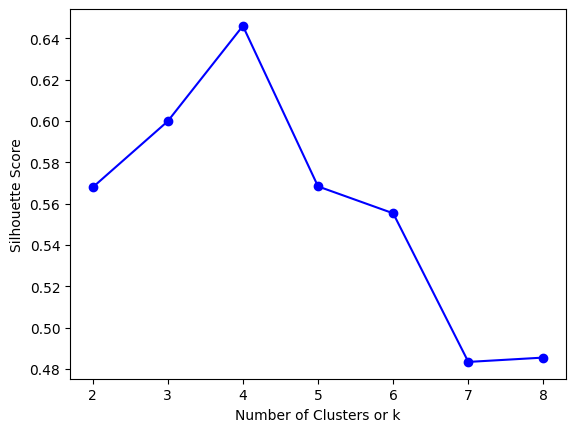

In [ ]:
silhouette_scores = []
for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, n_init=1)
    kmeans.fit(X)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

# Plot the silhouette scores
plt.plot(range(2, 9), silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters or k')
plt.ylabel('Silhouette Score')
plt.show()